In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import plotly.graph_objects as go

In [2]:
# Read the Excel file
data = pd.read_excel('cowpea.xlsx', sheet_name='Sheet3')
data

,Treatments,Grain yield,Dehydrogenase,Bacteria,Actinomycetes,Fungi,Soil Urease,Biomass Carbon,Biomass Nitrogen
0,T1,864.197531,3.60,22.3,22.80,6.6,44.7,122.50,21.9
1,T2,786.596120,3.33,21.2,20.90,6.3,43.2,121.37,21.3
2,T3,917.107584,3.72,23.6,23.10,7.0,46.1,123.10,23.7
3,T4,940.035273,4.15,25.6,25.10,7.9,50.8,129.30,25.1
4,T5,1070.546737,5.21,29.8,27.57,8.8,52.2,133.92,27.4
5,T6,991.181658,3.97,24.2,23.60,7.2,49.2,127.80,24.0
6,T7,978.835979,4.83,27.1,25.72,8.5,51.7,131.60,26.5
7,T8,767.195767,2.81,19.2,18.60,5.4,41.0,119.00,19.8


In [3]:
# Compute the correlation matrix
correlation_matrix = data.corr()

In [4]:
correlation_matrix

,Grain yield,Dehydrogenase,Bacteria,Actinomycetes,Fungi,Soil Urease,Biomass Carbon,Biomass Nitrogen
Grain yield,1.000000,0.923248,0.941396,0.935294,0.913083,0.935318,0.930067,0.940722
Dehydrogenase,0.923248,1.000000,0.990654,0.972002,0.985289,0.944033,0.972638,0.979306
Bacteria,0.941396,0.990654,1.000000,0.982583,0.986076,0.952225,0.972607,0.987516
Actinomycetes,0.935294,0.972002,0.982583,1.000000,0.982979,0.957677,0.952573,0.974582
Fungi,0.913083,0.985289,0.986076,0.982979,1.000000,0.973103,0.974550,0.992536
Soil Urease,0.935318,0.944033,0.952225,0.957677,0.973103,1.000000,0.980372,0.974735
Biomass Carbon,0.930067,0.972638,0.972607,0.952573,0.974550,0.980372,1.000000,0.971958
Biomass Nitrogen,0.940722,0.979306,0.987516,0.974582,0.992536,0.974735,0.971958,1.000000


In [8]:
correlation_matrix.to_excel('correlation.xlsx')

In [11]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

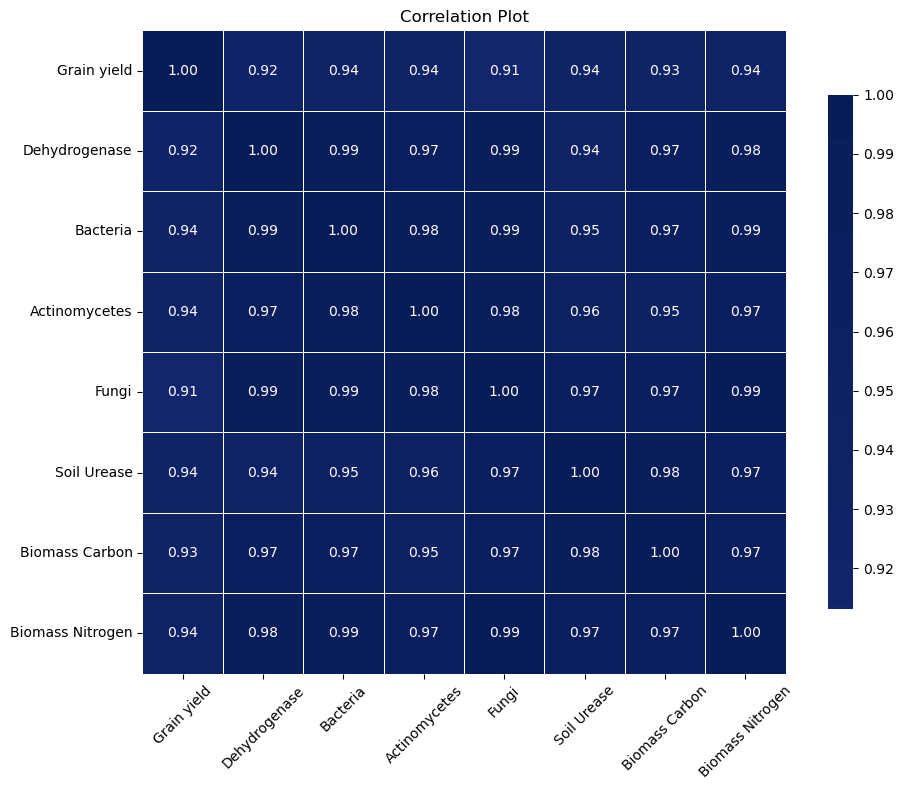

In [44]:
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap='YlGnBu', annot=True, fmt=".2f", 
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})

# Customize the plot
plt.title('Correlation Plot')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

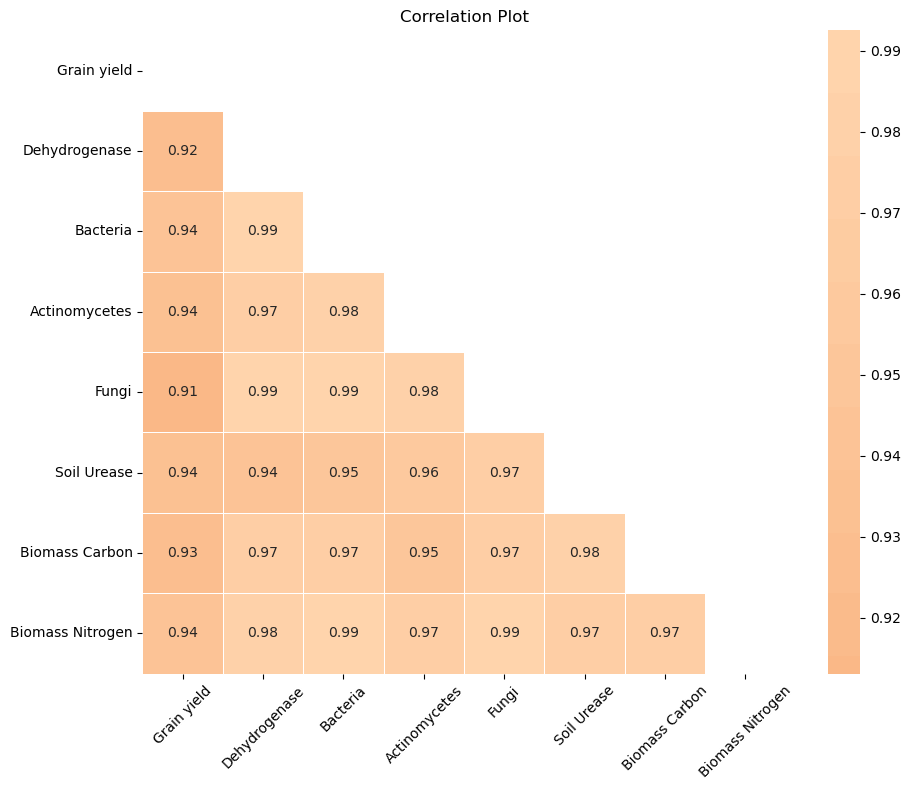

In [45]:
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", 
            center=0, square=True, linewidths=0.5)

# Customize the plot
plt.title('Correlation Plot')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

In [48]:
data = pd.read_excel('Graphs.xlsx', sheet_name='Sheet2', index_col='Treatment')
data

,Grain yield (kg/ha),Straw yield (kg/ha)
Treatment,,
I1,2644.50,4017.25
I2,2454.73,3765.25
I3,2551.00,3946.75
F1,2945.66,4712.00
F2,2068.00,3243.00
F3,1864.00,2899.66
F4,3322.66,4784.33


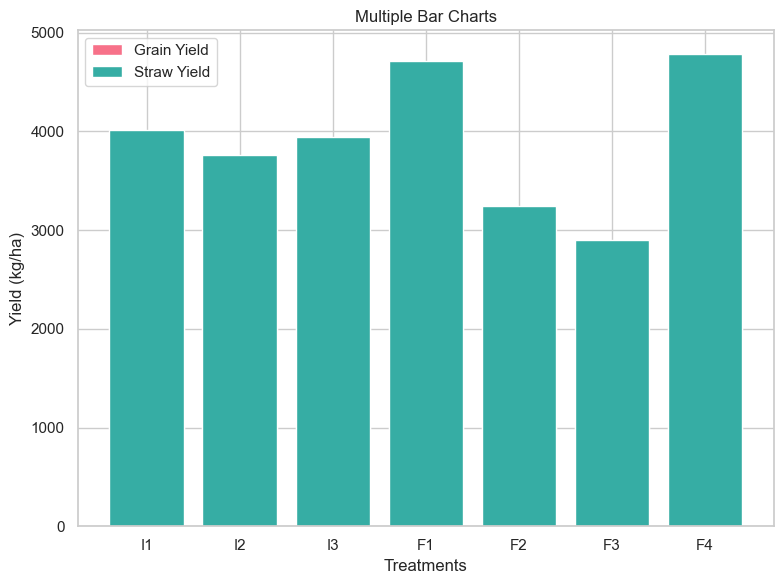

In [50]:
# Data for the bar charts
treatments = ['I1', 'I2', 'I3', 'F1', 'F2', 'F3', 'F4']
grain_yield = [2644.5, 2454.73, 2551, 2945.66, 2068, 1864, 3322.66]
straw_yield = [4017.25, 3765.25, 3946.75, 4712, 3243, 2899.66, 4784.33]

# Set the color palette
colors = sns.color_palette('husl', n_colors=2)

# Set the style
sns.set(style='whitegrid')

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the bar charts
ax.bar(treatments, grain_yield, label='Grain Yield', color=colors[0])
ax.bar(treatments, straw_yield, label='Straw Yield', color=colors[1])

# Customize the plot
ax.set_xlabel('Treatments')
ax.set_ylabel('Yield (kg/ha)')
ax.set_title('Multiple Bar Charts')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [52]:
import plotly.graph_objects as go

# Data for the bar charts
treatments = ['I1', 'I2', 'I3', 'F1', 'F2', 'F3', 'F4']
grain_yield = [2644.5, 2454.73, 2551, 2945.66, 2068, 1864, 3322.66]
straw_yield = [4017.25, 3765.25, 3946.75, 4712, 3243, 2899.66, 4784.33]

# Set the color palette
colors = ['rgb(31, 119, 180)', 'rgb(255, 127, 14)']

# Create a figure object
fig = go.Figure()

# Add the grain yield bar chart trace
fig.add_trace(go.Bar(x=treatments, y=grain_yield, name='Grain Yield', marker=dict(color=colors[0])))

# Add the straw yield bar chart trace
fig.add_trace(go.Bar(x=treatments, y=straw_yield, name='Straw Yield', marker=dict(color=colors[1])))

# Update layout
fig.update_layout(
    xaxis=dict(title='Treatments'),
    yaxis=dict(title='Yield (kg/ha)'),
    barmode='group'
)

# Show the plot
fig.show()

TypeError: matplotlib.axes._axes.Axes.bar() got multiple values for keyword argument 'label'

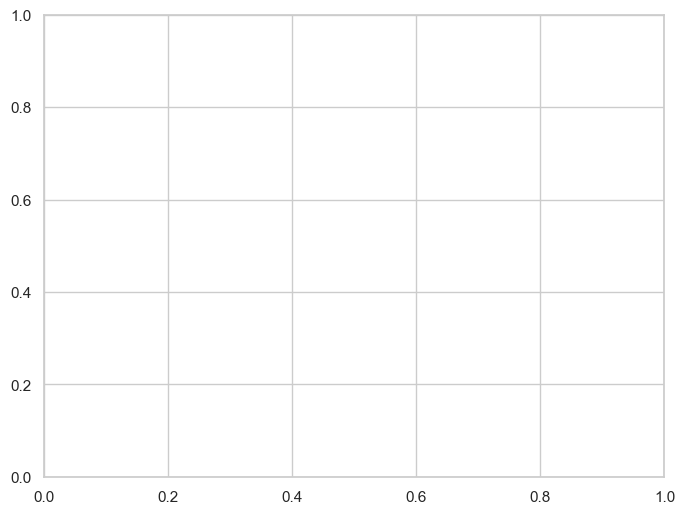

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create the data frame
data = {'Treatment': ['I1', 'I2', 'I3', 'F1', 'F2', 'F3', 'F4'],
        'Grain yield (kg/ha)': [2644.5, 2454.73, 2551, 2945.66, 2068, 1864, 3322.66],
        'Straw yield (kg/ha)': [4017.25, 3765.25, 3946.75, 4712, 3243, 2899.66, 4784.33]}

df = pd.DataFrame(data)

# Set the style
sns.set(style='whitegrid')

# Set the color palette
colors = sns.color_palette('husl', n_colors=2)

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the bar charts
sns.barplot(x='Treatment', y='Grain yield (kg/ha)',data=df, ax=ax, 
            color=colors[0], label='Grain Yield'

# Customize the plot
ax.set_xlabel('Treatment')
ax.set_ylabel('Yield (kg/ha)')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()
